# Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# input the data set to be processed via github
url = "https://github.com/bysyifa/DSAI-datapreprocessing/raw/7729c70a269b6780a31eda12da1a268109aed9f7/train.csv"

# checks the data in the table and displays the top 5 rows of each column
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# checks the data in the table and displays the last 5 rows of each column
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
# checking the data set information. by doing this, the information obtained is the column name, the number of non-nulls for each column, and the data type for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# brings up descriptive statistics that provide a summary of the data in the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing Values

In [ ]:
# select some columns that will be used to get new insights
columns = ["SalePrice", "LotArea", "MiscVal", "BedroomAbvGr", "YearRemodAdd", "YearBuilt", "YrSold", "MoSold", "OverallQual", "OverallCond", "1stFlrSF", "2ndFlrSF"]

# creates a new variable that will be used
df1 = df[columns]
df1

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,208500,8450,0,3,2003,2003,2008,2,7,5,856,854
1,181500,9600,0,3,1976,1976,2007,5,6,8,1262,0
2,223500,11250,0,3,2002,2001,2008,9,7,5,920,866
3,140000,9550,0,3,1970,1915,2006,2,7,5,961,756
4,250000,14260,0,4,2000,2000,2008,12,8,5,1145,1053
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,953,694
1456,210000,13175,0,3,1988,1978,2010,2,6,6,2073,0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,1188,1152
1458,142125,9717,0,2,1996,1950,2010,4,5,6,1078,0


In [ ]:
# checking for missing values in the data
missing_values = df1.isnull().sum()

missing_values

SalePrice       0
LotArea         0
MiscVal         0
BedroomAbvGr    0
YearRemodAdd    0
YearBuilt       0
YrSold          0
MoSold          0
OverallQual     0
OverallCond     0
1stFlrSF        0
2ndFlrSF        0
dtype: int64

In [ ]:
# re-filter the dataframe to show columns that have missing values
missval_col = missing_values[missing_values > 0].index

for col in missval_col:
    print(f"{missing_values[col]} missing value pada {col}")


#### seen from the selected columns, no missing values were found. therefore no further action was taken.

In [ ]:
# counts the number of values in all columns of the dataframe
total_cells = np.product(df.shape)
total_cells

118260

In [ ]:
# check for missing values in the whole dataframe
missing_values1 = df.isnull().sum()

total_missing = missing_values1.sum()
total_missing

7829

> however, when viewed as a whole there are missing values in other columns. but no further action is taken, because the column is not related to the column used.

## Duplicate Value

In [ ]:
duplicate_rows = df1[df1.duplicated()]
print("Baris yang memiliki duplikat:")
display(duplicate_rows)

Baris yang memiliki duplikat:


,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF


In [ ]:
df1 = df1.drop_duplicates()

df1

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,208500,8450,0,3,2003,2003,2008,2,7,5,856,854
1,181500,9600,0,3,1976,1976,2007,5,6,8,1262,0
2,223500,11250,0,3,2002,2001,2008,9,7,5,920,866
3,140000,9550,0,3,1970,1915,2006,2,7,5,961,756
4,250000,14260,0,4,2000,2000,2008,12,8,5,1145,1053
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,953,694
1456,210000,13175,0,3,1988,1978,2010,2,6,6,2073,0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,1188,1152
1458,142125,9717,0,2,1996,1950,2010,4,5,6,1078,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   MiscVal       1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   YrSold        1460 non-null   int64
 7   MoSold        1460 non-null   int64
 8   OverallQual   1460 non-null   int64
 9   OverallCond   1460 non-null   int64
 10  1stFlrSF      1460 non-null   int64
 11  2ndFlrSF      1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


#### no duplicate data found in selected columns

## Outlier

In [ ]:
numeric_cols = [col for col in df1.columns if df1[col].dtype != 'object']
iqr_cols = {}
for col in numeric_cols:
    q1 = np.percentile(df1[col], 25)
    q3 = np.percentile(df1[col], 75)
    iqr = q3 - q1
    iqr_cols[col] = iqr

lower_bound = {}
upper_bound = {}
for col, iqr in iqr_cols.items():
    lower_bound[col] = q1 - (1.5 * iqr)
    upper_bound[col] = q3 + (1.5 * iqr)

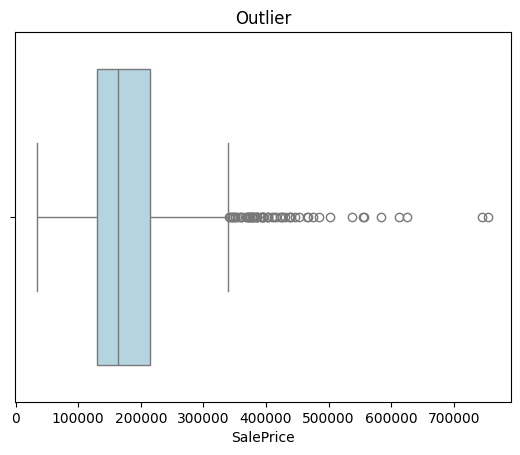

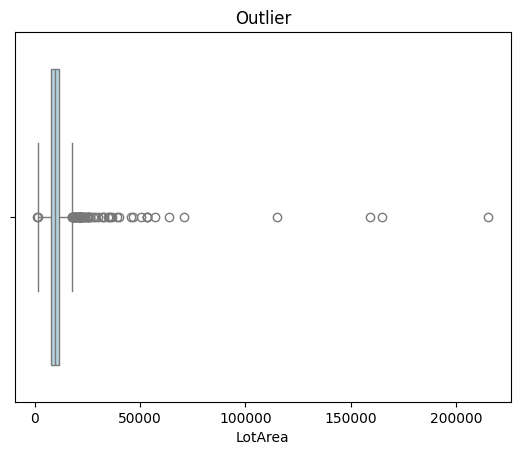

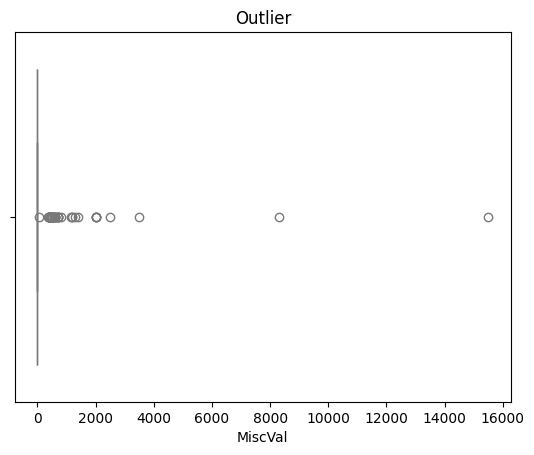

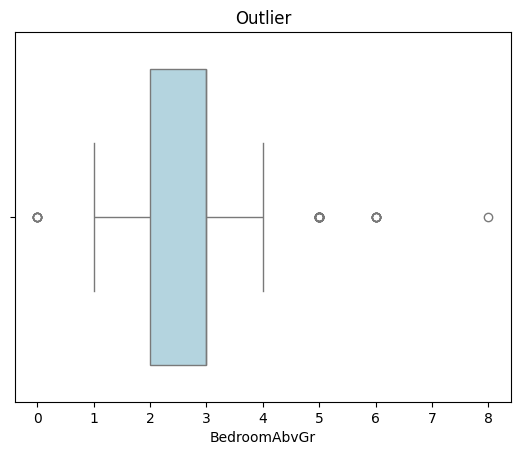

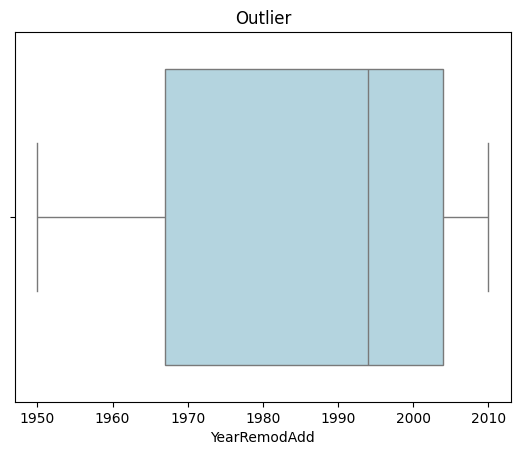

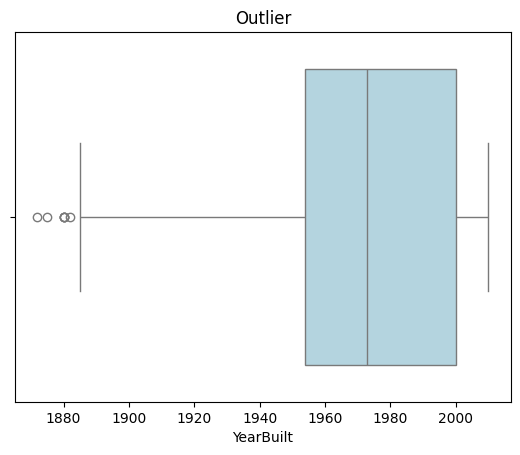

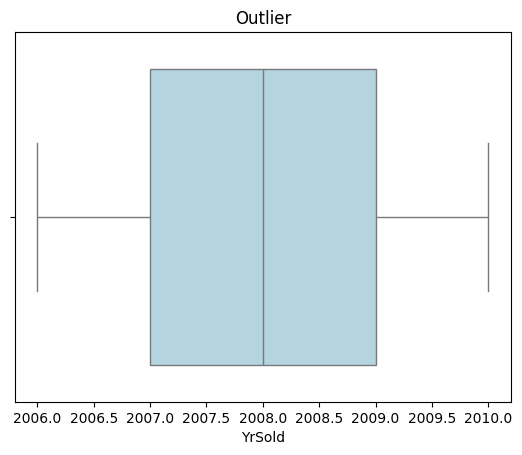

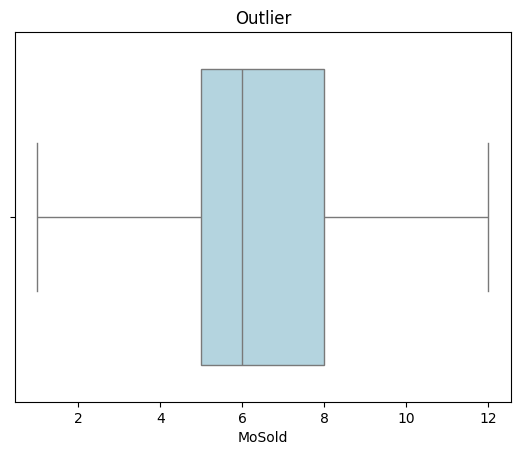

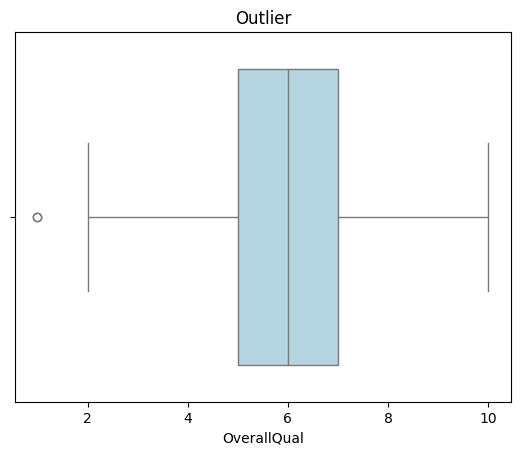

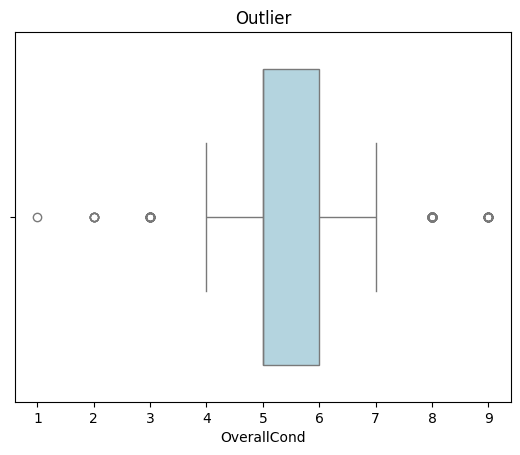

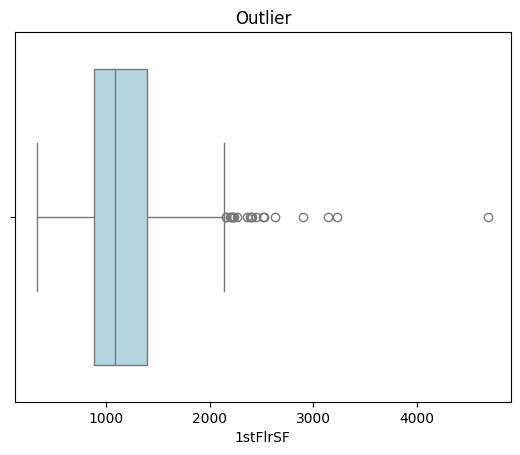

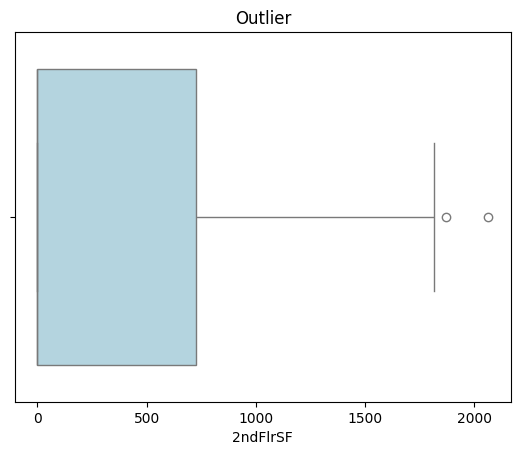

In [ ]:
outliers = {}
for col in numeric_cols:
    outliers[col] = df1[col][(df1[col] < lower_bound[col]) | (df1[col] > upper_bound[col])]

for col in numeric_cols:
    sns.boxplot(x=df1[col], color='lightblue')
    plt.title(f"Outlier")
    plt.show()

#### or

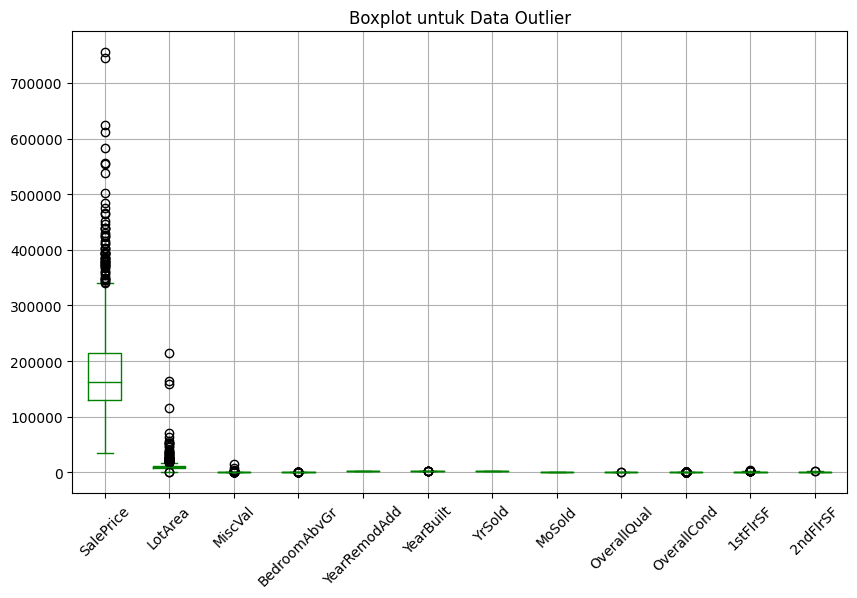

In [ ]:
plt.figure(figsize=(10,6))
df1.boxplot(color='g')
plt.title('Boxplot untuk Data Outlier')
plt.xticks(rotation=45)
plt.show()

## Imbalance Data

In [ ]:
num_cols = df1._get_numeric_data().columns.tolist()
num_cols.remove('MoSold')
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns     : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numeric Columns     :  ['SalePrice', 'LotArea', 'MiscVal', 'BedroomAbvGr', 'YearRemodAdd', 'YearBuilt', 'YrSold', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF']
Categorical Columns :  []


In [ ]:
df1.MoSold.value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [ ]:
X = df1.drop(['MoSold'], axis = 1)
y = df1['MoSold']

X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
y_train_imbalanced.value_counts()

MoSold
6     177
7     164
5     143
4      99
8      86
3      74
10     62
11     55
9      44
12     41
1      41
2      36
Name: count, dtype: int64

In [ ]:
# Feature Scaling

X_train_imbalanced_num = X_train_imbalanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train_imbalanced[cat_cols].reset_index().drop(['index'], axis = 1)

# Numeric Scaling
sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

# Ordinal Encoder
ore = OrdinalEncoder()
ore = ore.fit(X_train_imbalanced_cat)
X_train_imbalanced_cat = ore.transform(X_train_imbalanced_cat)

# Merge X_train
X_train_imbalanced_final = np.concatenate([X_train_imbalanced_num, X_train_imbalanced_cat], axis=1)

In [ ]:
# Train with Logistic Regression

lr_1 = LogisticRegression()
lr_1.fit(X_train_imbalanced_final, y_train_imbalanced)

LogisticRegression()

In [ ]:
# Feature Scaling

X_train_imbalanced_num = X_train_imbalanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train_imbalanced[cat_cols].reset_index().drop(['index'], axis = 1)

# Numeric Scaling
sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

In [ ]:
# Merge with Categorical Column

X_train_imbalanced_new = pd.DataFrame(data=X_train_imbalanced_num, columns=num_cols)
X_train_imbalanced_new = pd.concat([X_train_imbalanced_new, X_train_imbalanced_cat], axis=1)
X_train_imbalanced_new

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,0.785669,-0.091406,-0.095208,0.196773,1.153467,1.219246,0.884083,1.349903,-0.542124,0.802277,-0.779365
1,-0.103452,-0.598784,-0.095208,-1.029458,1.056662,1.153958,-0.628106,0.634713,-0.542124,0.255491,-0.779365
2,-0.337756,-0.226231,-0.095208,-1.029458,-0.589023,-0.739418,-0.628106,-0.795666,0.330397,1.039218,-0.779365
3,3.957857,0.605102,-0.095208,-2.255689,1.153467,1.219246,0.884083,2.065093,-0.542124,2.796745,-0.779365
4,-0.047959,-0.759736,-0.095208,0.196773,0.717844,0.958091,-0.628106,-0.080476,-0.542124,-1.017741,0.971107
...,...,...,...,...,...,...,...,...,...,...,...
1017,0.698113,0.204015,-0.095208,1.423004,-0.734231,-0.021241,0.127989,-0.080476,1.202917,2.492107,-0.779365
1018,-0.442576,-0.620809,-0.095208,-1.029458,0.959857,1.121313,-1.384201,-0.795666,-0.542124,-0.228806,-0.779365
1019,-0.158945,0.315477,-0.095208,0.196773,0.088612,-0.478263,-1.384201,-0.795666,0.330397,0.721561,-0.779365
1020,-0.084954,0.113596,-0.095208,0.196773,0.959857,1.121313,0.884083,-0.080476,-0.542124,-1.239059,1.248959


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   MiscVal       1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   YrSold        1460 non-null   int64
 7   MoSold        1460 non-null   int64
 8   OverallQual   1460 non-null   int64
 9   OverallCond   1460 non-null   int64
 10  1stFlrSF      1460 non-null   int64
 11  2ndFlrSF      1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


## Feature Encoding

#### No encoding is required because the contents of all selected columns are integers

# Exploratory Data Analysis

## Feature elaboration and data type

In [ ]:
for col in df1.columns:
    if df1[col].dtype == 'object':
        print(f'{col} is nominal')
    elif df1[col].dtype == 'int64' or data[col].dtype == 'float64':
        print(f'{col} is numerical')
    else:
        print(f'{col} is ordinal')

SalePrice is numerical
LotArea is numerical
MiscVal is numerical
BedroomAbvGr is numerical
YearRemodAdd is numerical
YearBuilt is numerical
YrSold is numerical
MoSold is numerical
OverallQual is numerical
OverallCond is numerical
1stFlrSF is numerical
2ndFlrSF is numerical


In [ ]:
fitur_definitions = {
  "SalePrice": {
    "definisi": "Harga jual rumah dalam USD ($)",
    "tipe_data": "numerik"
  },
  "LotArea": {
    "definisi": "Luas tanah dalam ft^2",
    "tipe_data": "numerik"
  },
  "MiscVal": {
    "definisi": "Nilai fitur lainnya dalam USD ($)",
    "tipe_data": "numerik"
  },
  "BedroomAbvGr": {
    "definisi": "Jumlah kamar tidur di atas tanah pada bangunan",
    "tipe_data": "numerik"
  },
  "YearRemodAdd": {
    "definisi": "Tahun dilakukannya renovasi terhadap rumah",
    "tipe_data": "numerik"
  },
  "YearBuilt": {
    "definisi": "Tahun dibangunnya rumah",
    "tipe_data": "numerik"
  },
  "YrSold": {
    "definisi": "Tahun dijualnya rumah",
    "tipe_data": "numerik"
  },
  "MoSold": {
    "definisi": "Bulan dijualnya rumah",
    "tipe_data": "numerik"
  },
  "OverallQual": {
    "definisi": "Kualitas rumah secara keseluruhan",
    "tipe_data": "numerik"
  },
  "OverallCond": {
    "definisi": "Kondisi rumah secara keseluruhan",
    "tipe_data": "numerik"
  },
  "1stFlrSF": {
    "definisi": "Luas Lantai 1",
    "tipe_data": "numerik"
  },
  "2ndFlrSF": {
    "definisi": "Luas lantai 2",
    "tipe_data": "numerik"
  }
}

for fitur, definisi in fitur_definitions.items():
  print(f"fitur: {fitur}")
  print(f"deskripsi: {definisi['definisi']}")
  print(f"tipe Data: {definisi['tipe_data']}")
  print("\n")


fitur: SalePrice
deskripsi: Harga jual rumah dalam USD ($)
tipe Data: numerik


fitur: LotArea
deskripsi: Luas tanah dalam ft^2
tipe Data: numerik


fitur: MiscVal
deskripsi: Nilai fitur lainnya dalam USD ($)
tipe Data: numerik


fitur: BedroomAbvGr
deskripsi: Jumlah kamar tidur di atas tanah pada bangunan
tipe Data: numerik


fitur: YearRemodAdd
deskripsi: Tahun dilakukannya renovasi terhadap rumah
tipe Data: numerik


fitur: YearBuilt
deskripsi: Tahun dibangunnya rumah
tipe Data: numerik


fitur: YrSold
deskripsi: Tahun dijualnya rumah
tipe Data: numerik


fitur: MoSold
deskripsi: Bulan dijualnya rumah
tipe Data: numerik


fitur: OverallQual
deskripsi: Kualitas rumah secara keseluruhan
tipe Data: numerik


fitur: OverallCond
deskripsi: Kondisi rumah secara keseluruhan
tipe Data: numerik


fitur: 1stFlrSF
deskripsi: Luas Lantai 1
tipe Data: numerik


fitur: 2ndFlrSF
deskripsi: Luas lantai 2
tipe Data: numerik




## Conditions and Differences Using Mean, Median, Mode

*   Mean atau nilai rata-rata dapat digunakan saat kurva berbentuk normal. ini karena mean merupakan pusat dari distribusi normal. selain itu, mean juga dapat digunakan untuk memprediksi kemana data baru akan masuk.
*   Median atau nilai tengah dapat digunakan saat didapati kurva berbentuk left/right skewed. ini dikarenakan median tidak terpengaruh oleh outlier dan lebih mudah diinterpretasikan.
*   Modus atau nilai yang paling banyak muncul dapat digunakan dalam segala bentuk kurva, baik kurva normal dan left/right skewed.




In [ ]:
df1.mean()

SalePrice       180921.195890
LotArea          10516.828082
MiscVal             43.489041
BedroomAbvGr         2.866438
YearRemodAdd      1984.865753
YearBuilt         1971.267808
YrSold            2007.815753
MoSold               6.321918
OverallQual          6.099315
OverallCond          5.575342
1stFlrSF          1162.626712
2ndFlrSF           346.992466
dtype: float64

In [ ]:
df1.median()

SalePrice       163000.0
LotArea           9478.5
MiscVal              0.0
BedroomAbvGr         3.0
YearRemodAdd      1994.0
YearBuilt         1973.0
YrSold            2008.0
MoSold               6.0
OverallQual          6.0
OverallCond          5.0
1stFlrSF          1087.0
2ndFlrSF             0.0
dtype: float64

In [ ]:
df1.mode()

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,140000,7200,0,3,1950,2006,2009,6,5,5,864,0


## Statistical Five Summaries

In [ ]:
minimum = df1.min()
q1 = df1.quantile(0.25)
median = df1.median()
q3 = df1.quantile(0.75)
maximum = df1.max()

print("\nMinimum:", minimum)
print("\nKuartil bawah (Q1):", q1)
print("\nMedian:", median)
print("\nKuartil atas (Q3):", q3)
print("\nMaksimum:", maximum)


Minimum: SalePrice       34900
LotArea          1300
MiscVal             0
BedroomAbvGr        0
YearRemodAdd     1950
YearBuilt        1872
YrSold           2006
MoSold              1
OverallQual         1
OverallCond         1
1stFlrSF          334
2ndFlrSF            0
dtype: int64

Kuartil bawah (Q1): SalePrice       129975.0
LotArea           7553.5
MiscVal              0.0
BedroomAbvGr         2.0
YearRemodAdd      1967.0
YearBuilt         1954.0
YrSold            2007.0
MoSold               5.0
OverallQual          5.0
OverallCond          5.0
1stFlrSF           882.0
2ndFlrSF             0.0
Name: 0.25, dtype: float64

Median: SalePrice       163000.0
LotArea           9478.5
MiscVal              0.0
BedroomAbvGr         3.0
YearRemodAdd      1994.0
YearBuilt         1973.0
YrSold            2008.0
MoSold               6.0
OverallQual          6.0
OverallCond          5.0
1stFlrSF          1087.0
2ndFlrSF             0.0
dtype: float64

Kuartil atas (Q3): SalePrice       21400

## Distribusi Data

In [ ]:
df1.describe()

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,43.489041,2.866438,1984.865753,1971.267808,2007.815753,6.321918,6.099315,5.575342,1162.626712,346.992466
std,79442.502883,9981.264932,496.123024,0.815778,20.645407,30.202904,1.328095,2.703626,1.382997,1.112799,386.587738,436.528436
min,34900.000000,1300.000000,0.000000,0.000000,1950.000000,1872.000000,2006.000000,1.000000,1.000000,1.000000,334.000000,0.000000
25%,129975.000000,7553.500000,0.000000,2.000000,1967.000000,1954.000000,2007.000000,5.000000,5.000000,5.000000,882.000000,0.000000
50%,163000.000000,9478.500000,0.000000,3.000000,1994.000000,1973.000000,2008.000000,6.000000,6.000000,5.000000,1087.000000,0.000000
75%,214000.000000,11601.500000,0.000000,3.000000,2004.000000,2000.000000,2009.000000,8.000000,7.000000,6.000000,1391.250000,728.000000
max,755000.000000,215245.000000,15500.000000,8.000000,2010.000000,2010.000000,2010.000000,12.000000,10.000000,9.000000,4692.000000,2065.000000


# Feature Engineering

### The following are 10 features/insights obtained from the dataset used

In [ ]:
NewCol = {
    "HargaAsli": df1["SalePrice"].astype("int") - df1["MiscVal"].astype("int"),
    "HargaPerFeet": df1["SalePrice"] / df1["LotArea"],
    "HargaPerMeter": df1["SalePrice"] / (df1["LotArea"] * 0.3048),
    "LuasBangunan": df1["1stFlrSF"] + df1["2ndFlrSF"],
    # "LuasLahanTersisa" is calculated after NewCol is fully defined
    "JumlahKamarTidurDiLantai1": df1["BedroomAbvGr"],
    "UsiaAsliBangunan": df1["YrSold"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatRenov": df1["YearRemodAdd"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatTerjual": df1["YrSold"].astype("int") - df1["YearRemodAdd"].astype("int"),
    "BulanTerjual": df1["MoSold"].map({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"}),
    "SkorKeseluruhanBangunan": (df1["OverallQual"] + df1["OverallCond"]) / 2
}

# Calculate "LuasLahanTersisa" after NewCol is fully defined
NewCol["LuasLahanTersisa"] = df1["LotArea"] - NewCol["LuasBangunan"]

df2 = pd.DataFrame(NewCol)

df2


,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan,LuasLahanTersisa
0,208500,24.674556,80.953268,1710,3,5,0,5,Februari,6.0,6740
1,181500,18.906250,62.028379,1262,3,31,0,31,Mei,7.0,8338
2,223500,19.866667,65.179353,1786,3,7,1,6,September,6.0,9464
3,140000,14.659686,48.096082,1717,3,91,55,36,Februari,6.0,7833
4,250000,17.531557,57.518231,2198,4,8,0,8,Desember,6.5,12062
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,22.104332,72.520776,1647,3,8,1,7,Agustus,5.5,6270
1456,210000,15.939279,52.294222,2073,3,32,10,22,Februari,6.0,11102
1457,264000,29.473568,96.698057,2340,4,69,65,4,Mei,8.0,6702
1458,142125,14.626428,47.986968,1078,2,60,46,14,April,5.5,8639


In [ ]:
NewCol = {
    "HargaAsli": df1["SalePrice"].astype("int") - df1["MiscVal"].astype("int"),
    "HargaPerFeet": df1["SalePrice"] / df1["LotArea"],
    "HargaPerMeter": df1["SalePrice"] / (df1["LotArea"] * 0.3048),
    "LuasBangunan": df1["1stFlrSF"] + df1["2ndFlrSF"],
    "LuasLahanTersisa": df1["LotArea"] - NewCol["LuasBangunan"],
    "JumlahKamarTidurDiLantai1": df1["BedroomAbvGr"],
    "UsiaAsliBangunan": df1["YrSold"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatRenov": df1["YearRemodAdd"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatTerjual": df1["YrSold"].astype("int") - df1["YearRemodAdd"].astype("int"),
    "BulanTerjual": df1["MoSold"].map({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"}),
    "SkorKeseluruhanBangunan": (df1["OverallQual"] + df1["OverallCond"]) / 2
}

df2 = pd.DataFrame(NewCol)

df2


,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan
0,208500,24.674556,80.953268,1710,6740,3,5,0,5,Februari,6.0
1,181500,18.906250,62.028379,1262,8338,3,31,0,31,Mei,7.0
2,223500,19.866667,65.179353,1786,9464,3,7,1,6,September,6.0
3,140000,14.659686,48.096082,1717,7833,3,91,55,36,Februari,6.0
4,250000,17.531557,57.518231,2198,12062,4,8,0,8,Desember,6.5
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,22.104332,72.520776,1647,6270,3,8,1,7,Agustus,5.5
1456,210000,15.939279,52.294222,2073,11102,3,32,10,22,Februari,6.0
1457,264000,29.473568,96.698057,2340,6702,4,69,65,4,Mei,8.0
1458,142125,14.626428,47.986968,1078,8639,2,60,46,14,April,5.5


In [ ]:
df3 = pd.concat([df1, df2], axis=1, join='outer')
df3

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,...,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan
0,208500,8450,0,3,2003,2003,2008,2,7,5,...,24.674556,80.953268,1710,6740,3,5,0,5,Februari,6.0
1,181500,9600,0,3,1976,1976,2007,5,6,8,...,18.906250,62.028379,1262,8338,3,31,0,31,Mei,7.0
2,223500,11250,0,3,2002,2001,2008,9,7,5,...,19.866667,65.179353,1786,9464,3,7,1,6,September,6.0
3,140000,9550,0,3,1970,1915,2006,2,7,5,...,14.659686,48.096082,1717,7833,3,91,55,36,Februari,6.0
4,250000,14260,0,4,2000,2000,2008,12,8,5,...,17.531557,57.518231,2198,12062,4,8,0,8,Desember,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,...,22.104332,72.520776,1647,6270,3,8,1,7,Agustus,5.5
1456,210000,13175,0,3,1988,1978,2010,2,6,6,...,15.939279,52.294222,2073,11102,3,32,10,22,Februari,6.0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,...,29.473568,96.698057,2340,6702,4,69,65,4,Mei,8.0
1458,142125,9717,0,2,1996,1950,2010,4,5,6,...,14.626428,47.986968,1078,8639,2,60,46,14,April,5.5


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  1460 non-null   int64  
 1   LotArea                    1460 non-null   int64  
 2   MiscVal                    1460 non-null   int64  
 3   BedroomAbvGr               1460 non-null   int64  
 4   YearRemodAdd               1460 non-null   int64  
 5   YearBuilt                  1460 non-null   int64  
 6   YrSold                     1460 non-null   int64  
 7   MoSold                     1460 non-null   int64  
 8   OverallQual                1460 non-null   int64  
 9   OverallCond                1460 non-null   int64  
 10  1stFlrSF                   1460 non-null   int64  
 11  2ndFlrSF                   1460 non-null   int64  
 12  HargaAsli                  1460 non-null   int64  
 13  HargaPerFeet               1460 non-null   float

In [ ]:
df3.describe()

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,...,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,SkorKeseluruhanBangunan
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,43.489041,2.866438,1984.865753,1971.267808,2007.815753,6.321918,6.099315,5.575342,...,180877.706849,21.069878,69.126898,1509.619178,9007.208904,2.866438,36.547945,13.597945,22.950000,5.837329
std,79442.502883,9981.264932,496.123024,0.815778,20.645407,30.202904,1.328095,2.703626,1.382997,1.112799,...,79454.563764,12.387559,40.641596,521.163523,9856.055638,0.815778,30.250152,24.476465,20.640653,0.846764
min,34900.000000,1300.000000,0.000000,0.000000,1950.000000,1872.000000,2006.000000,1.000000,1.000000,1.000000,...,34900.000000,1.390441,4.561814,334.000000,71.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,129975.000000,7553.500000,0.000000,2.000000,1967.000000,1954.000000,2007.000000,5.000000,5.000000,5.000000,...,129900.000000,13.775136,45.194014,1123.750000,6277.250000,2.000000,8.000000,0.000000,4.000000,5.500000
50%,163000.000000,9478.500000,0.000000,3.000000,1994.000000,1973.000000,2008.000000,6.000000,6.000000,5.000000,...,162950.000000,17.856628,58.584739,1458.000000,7967.000000,3.000000,35.000000,0.000000,14.000000,6.000000
75%,214000.000000,11601.500000,0.000000,3.000000,2004.000000,2000.000000,2009.000000,8.000000,7.000000,6.000000,...,214000.000000,23.769031,77.982385,1775.250000,9863.000000,3.000000,54.000000,20.000000,41.000000,6.500000
max,755000.000000,215245.000000,15500.000000,8.000000,2010.000000,2010.000000,2010.000000,12.000000,10.000000,9.000000,...,755000.000000,95.384615,312.941652,5642.000000,213209.000000,8.000000,136.000000,123.000000,60.000000,9.500000
